In [1]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns; sns.set()
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.preprocessing
import matplotlib.pyplot as plt

In [2]:
#question 1
#Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')
#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

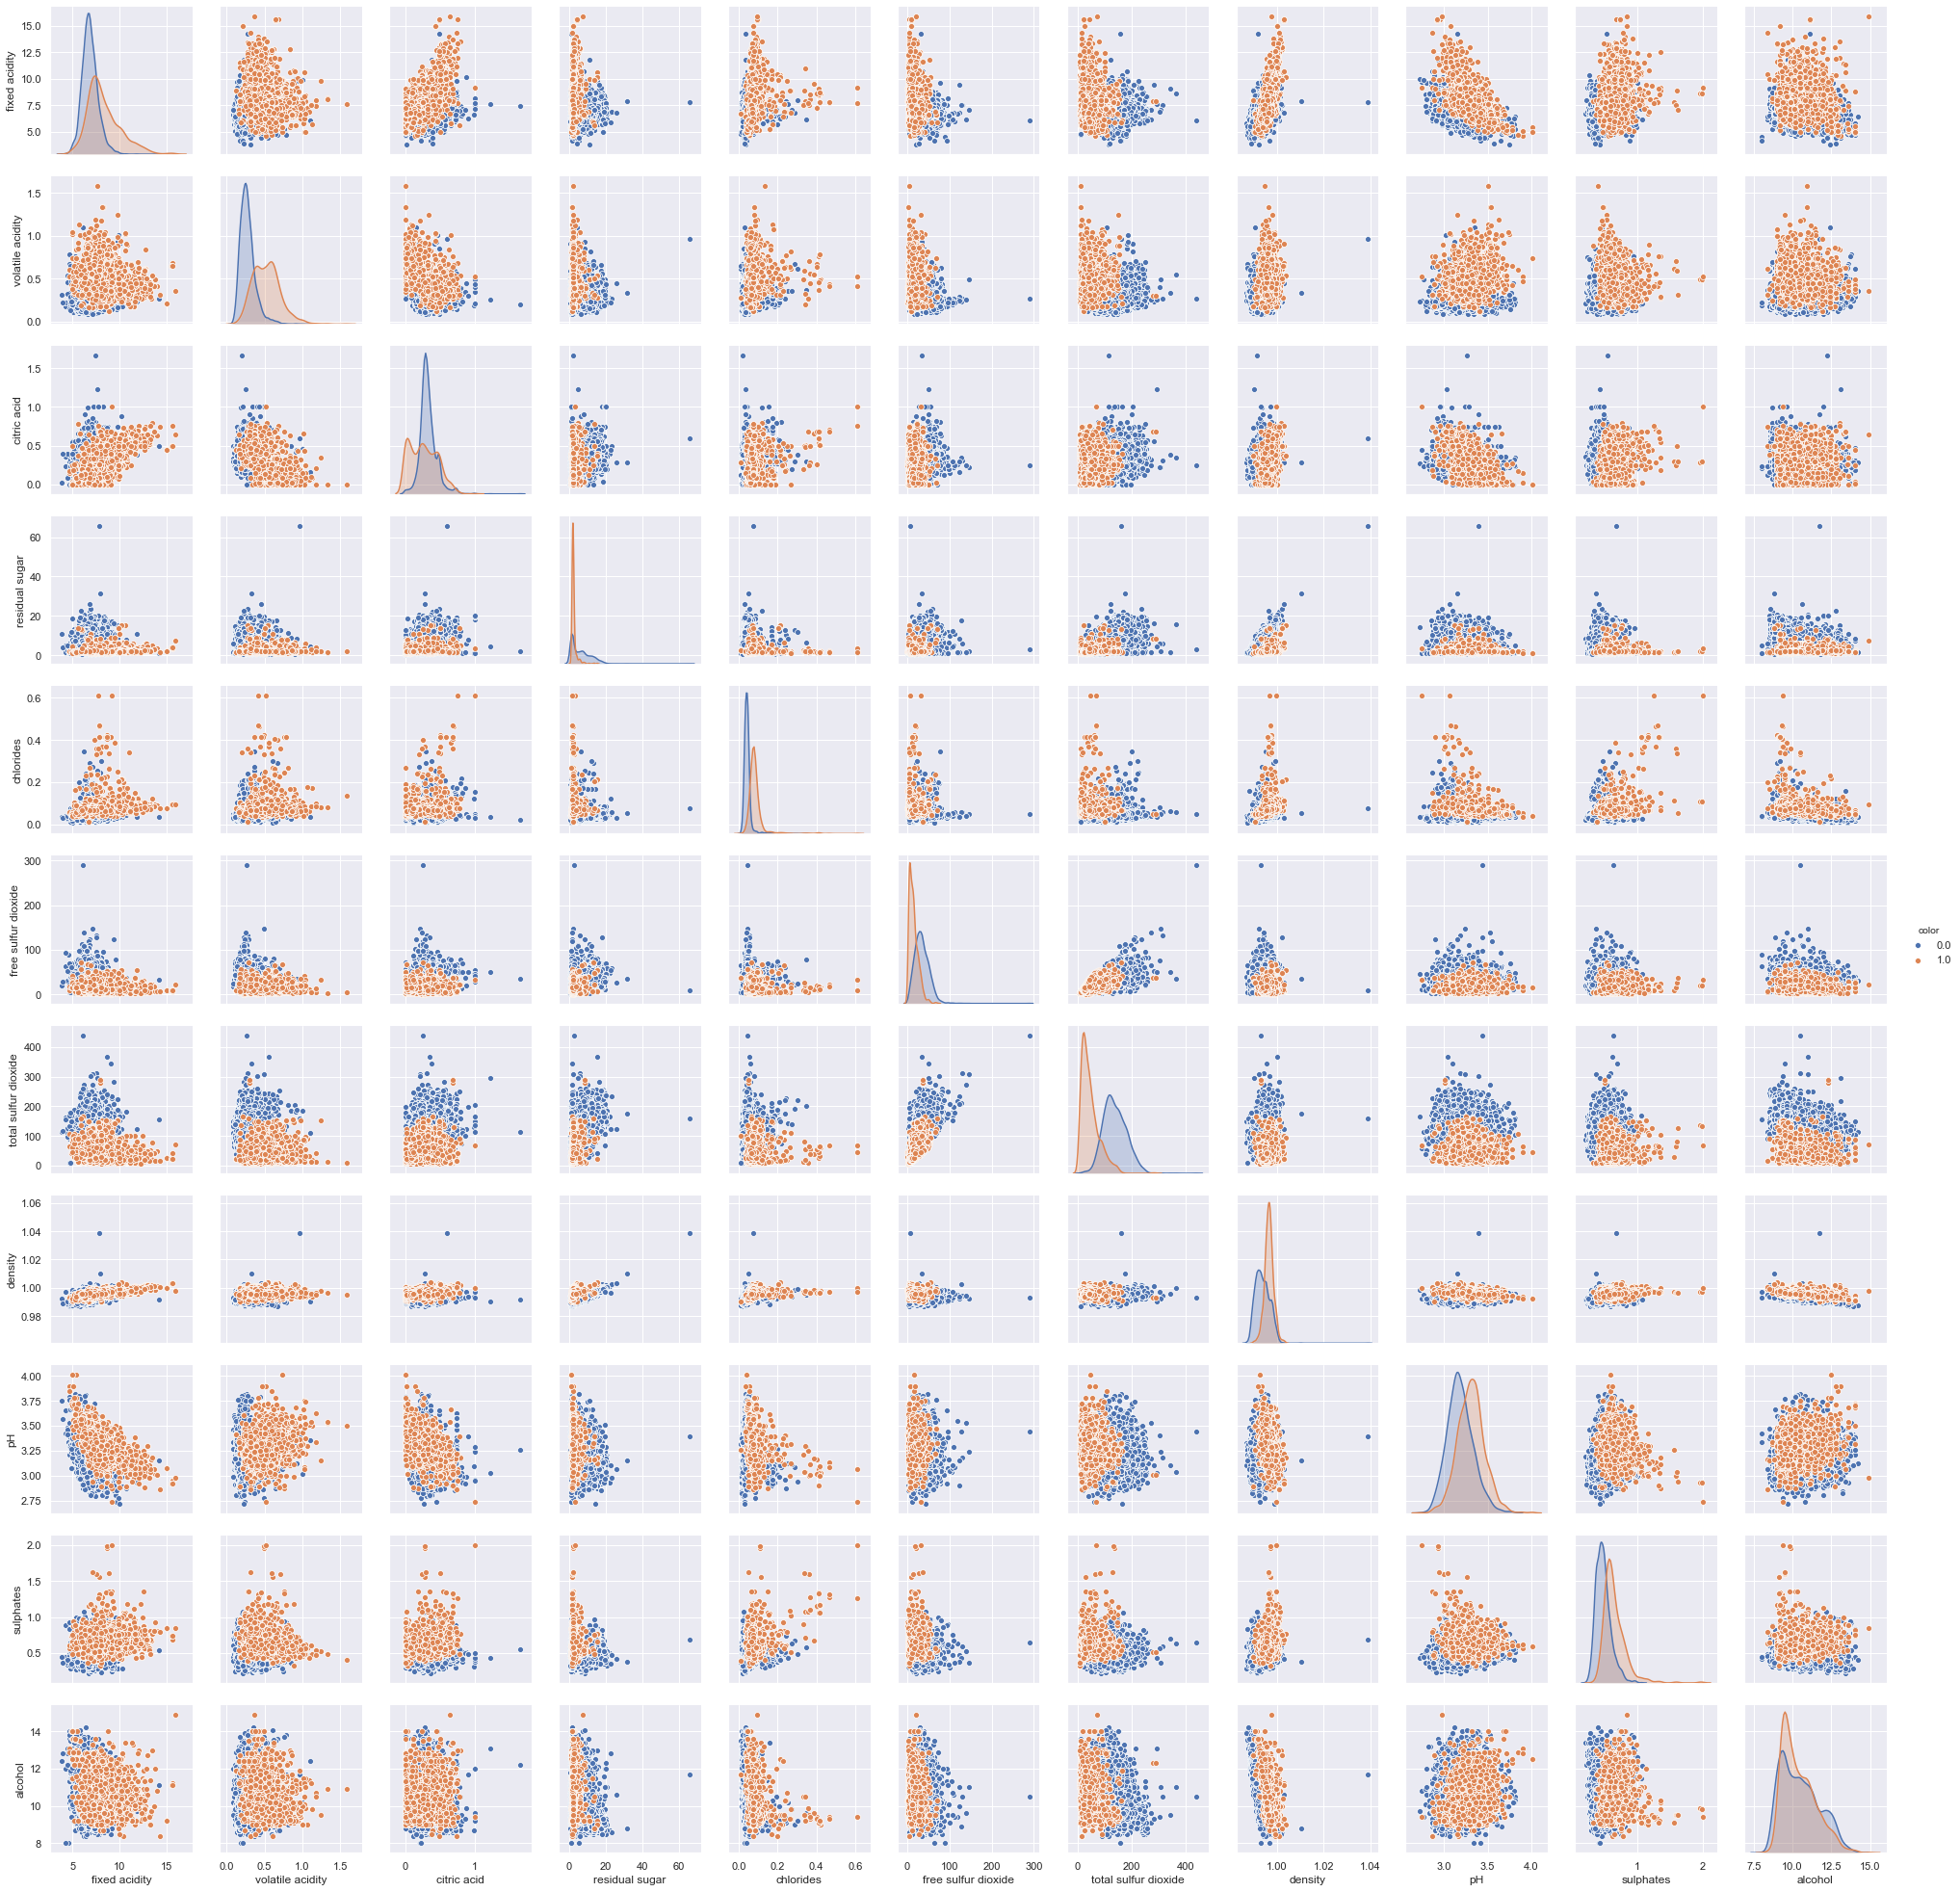

In [3]:
g = sns.pairplot(wine[DC],vars=D,hue="color") #pairplot without normalization

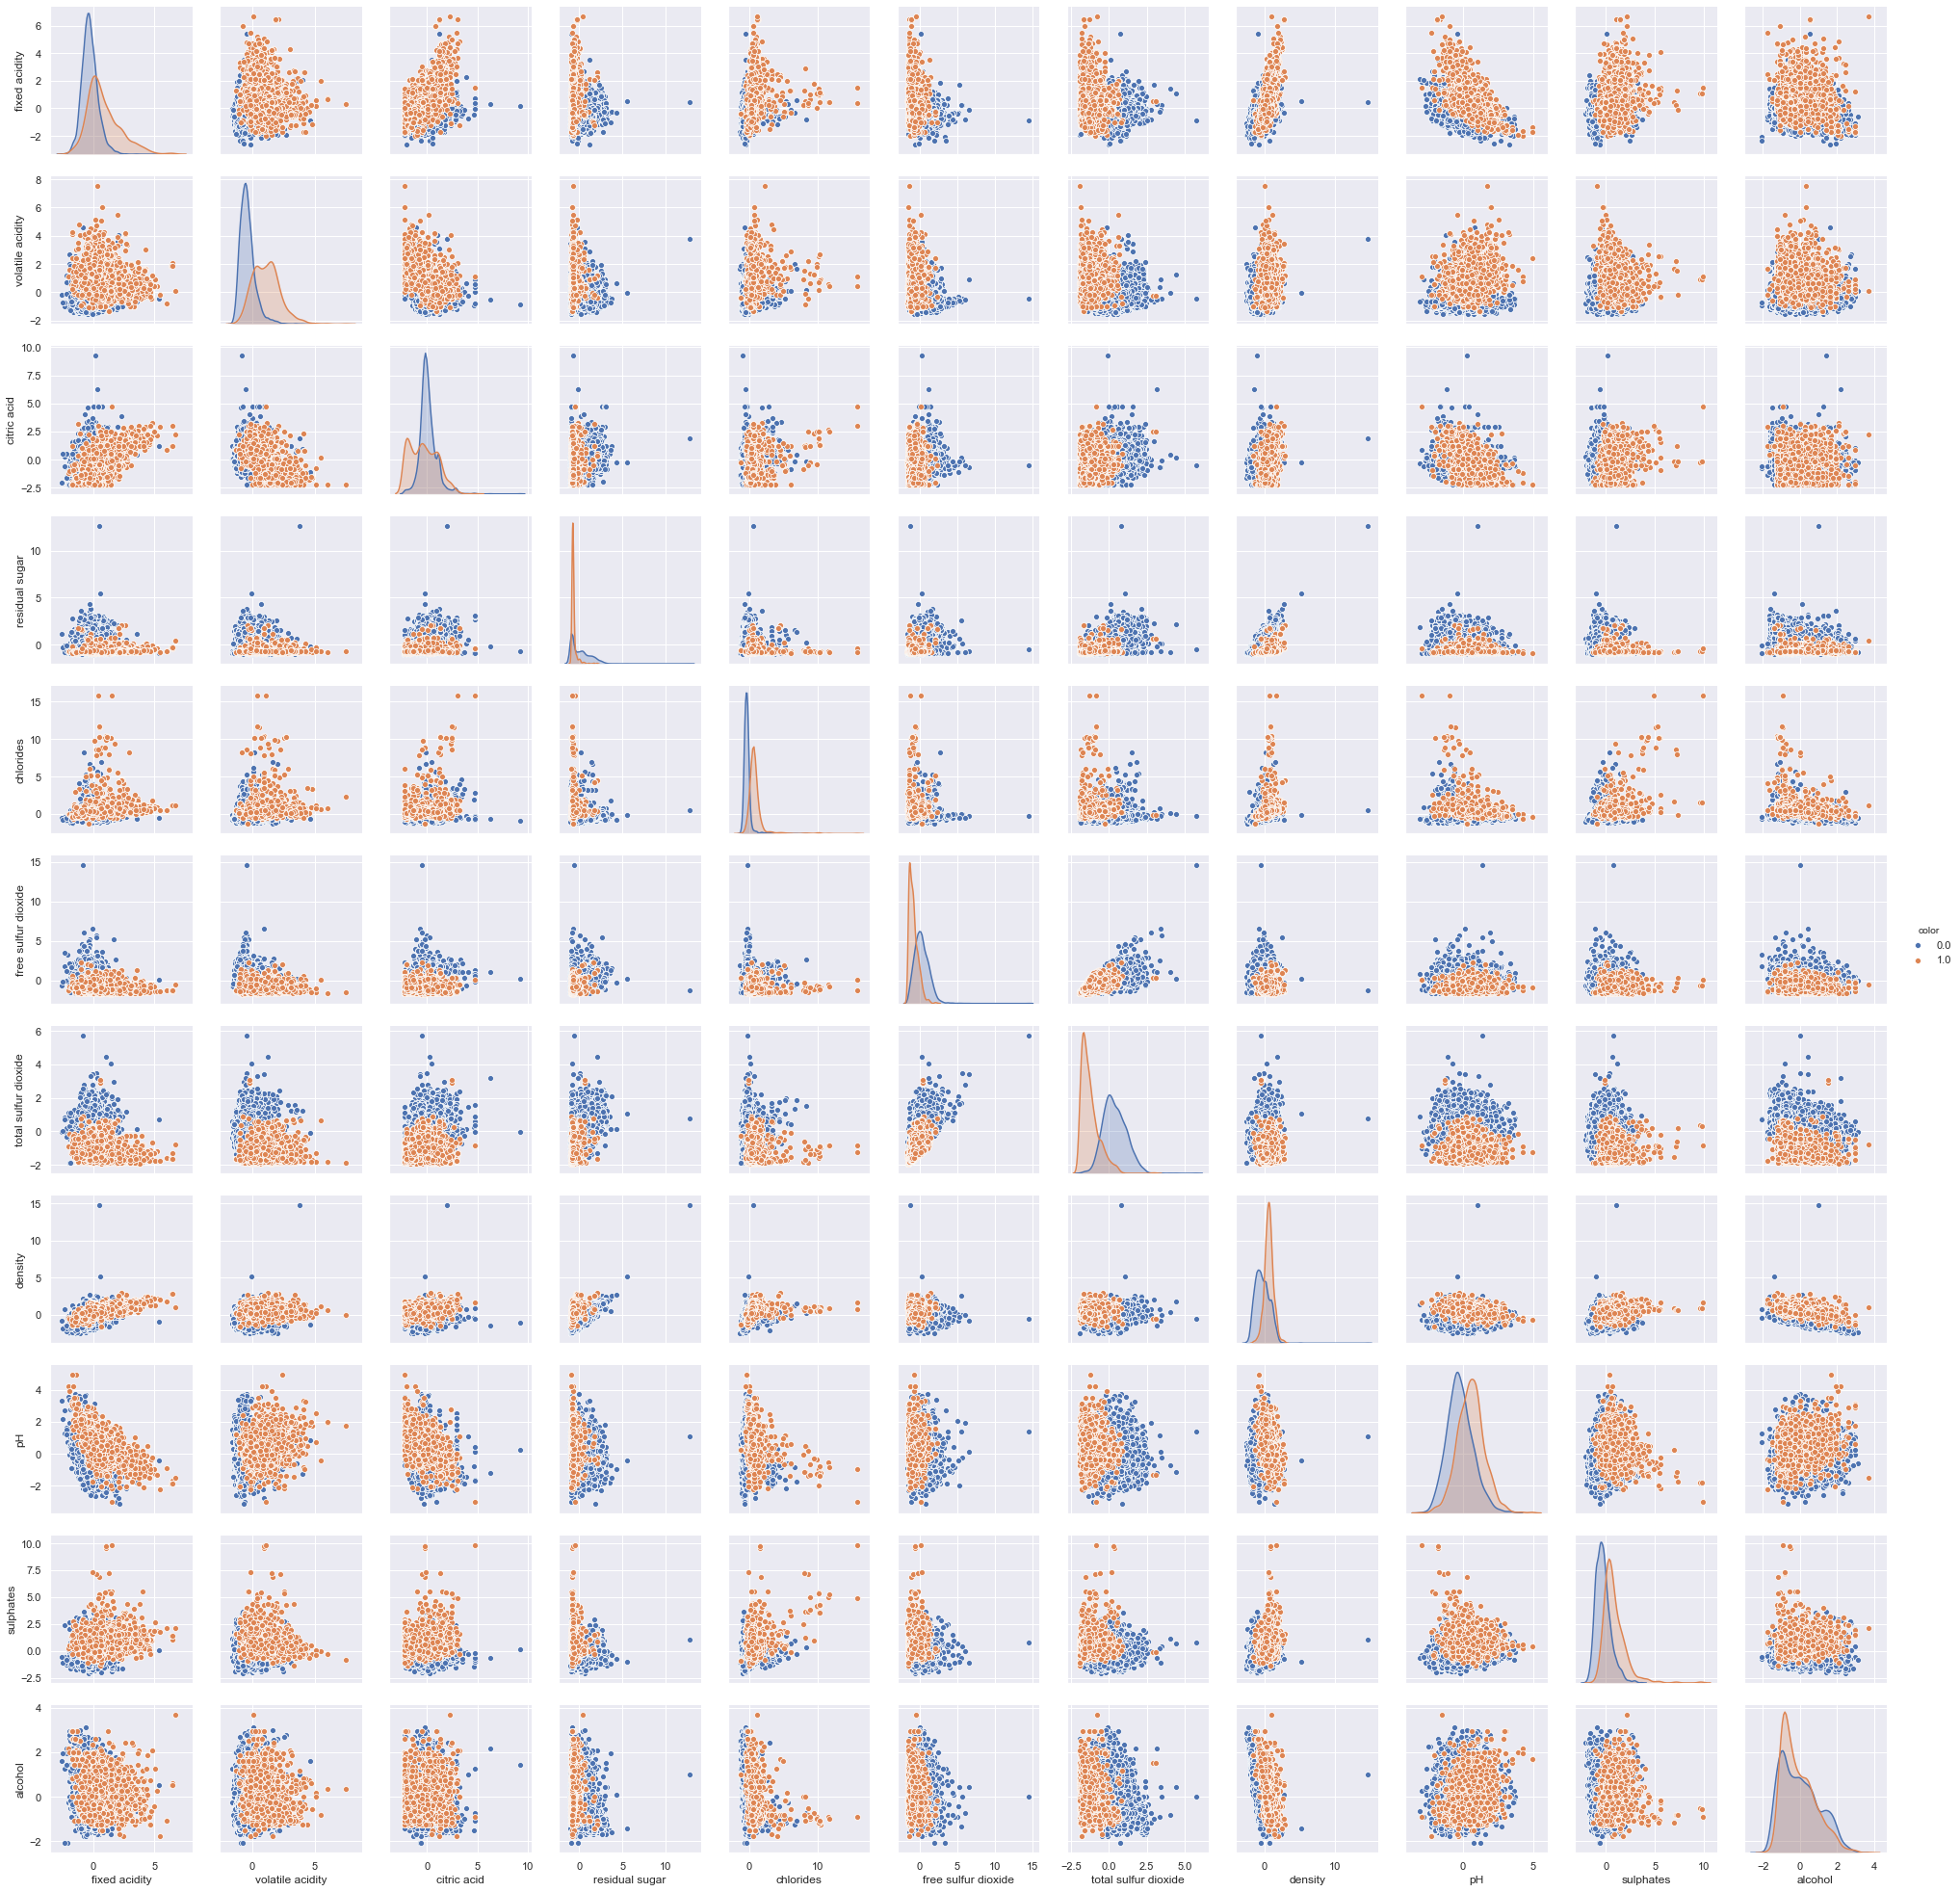

In [4]:
from sklearn.preprocessing import StandardScaler
zScore=StandardScaler()
zScore.fit(wine[D])
wine[D]=zScore.transform(wine[D])
g = sns.pairplot(wine[DC],vars= D ,hue="color")

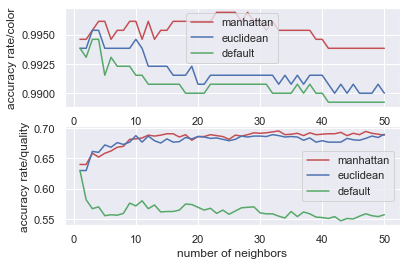

In [5]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
neighbors=range(1,51)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

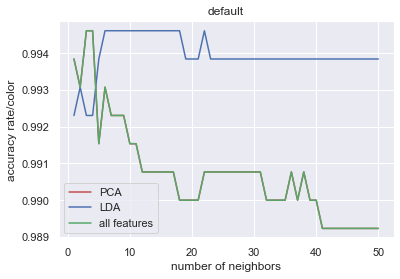

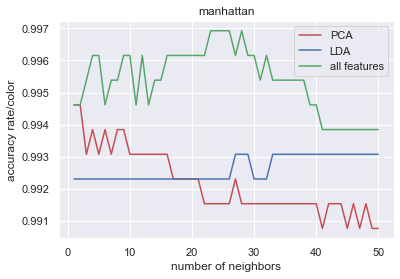

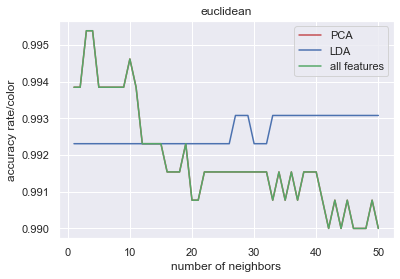

In [6]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
pca=PCA().fit(X_train)
X_train_PCA=pca.transform(X_train)
X_test_PCA=pca.transform(X_test)
lda=LinearDiscriminantAnalysis().fit(X_train,y1_train)
X_train_LDA=lda.transform(X_train)
X_test_LDA=lda.transform(X_test)
for i in range(3):
    result1=[]
    result2=[]
    result3=[]
    for n in neighbors:
        if(i==0):
            neigh_1=KNeighborsClassifier(n_neighbors=n)
            neigh_2 = KNeighborsClassifier(n_neighbors=n)
            neigh_3 = KNeighborsClassifier(n_neighbors=n)
        elif(i==1):
            neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
            neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
            neigh_3=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
        else:
            neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
            neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
            neigh_3=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
        neigh_1.fit(X_train_PCA,y1_train)
        neigh_2.fit(X_train_LDA,y1_train)
        neigh_3.fit(X_train,y1_train)
        result1.append(neigh_1.score(X_test_PCA,y1_test))
        result2.append(neigh_2.score(X_test_LDA,y1_test))
        result3.append(neigh_3.score(X_test,y1_test))
    if(i==0):
        plt.title("default")
    elif(i==1):
        plt.title("manhattan")
    else:
        plt.title("euclidean")
    plt.xlabel('number of neighbors')
    plt.ylabel('accuracy rate/color')
    plt.plot(neighbors, result1,'r',label="PCA")
    plt.plot(neighbors, result2,'b',label="LDA")
    plt.plot(neighbors, result3,'g',label="all features")
    plt.legend()
    plt.show()

In [7]:
set_1=D
#set_2 generated by PCA model
set_3=['residual sugar', 'chlorides', 'total sulfur dioxide', 'density']
#set_4 will be automaticlly generated by LDA model

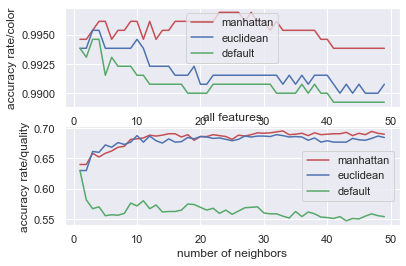

In [8]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[set_1].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
neighbors=range(1,50)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('all features')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

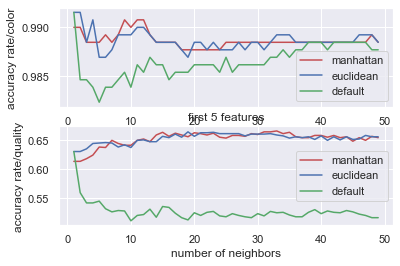

In [9]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
pca=PCA(n_components=5).fit(X_train)
X_train=pca.transform(X_train)
X_test=pca.transform(X_test)
neighbors=range(1,50)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('first 5 features')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

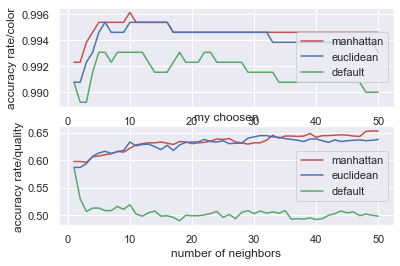

In [10]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[set_3].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
neighbors=range(1,51)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('my choosen')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

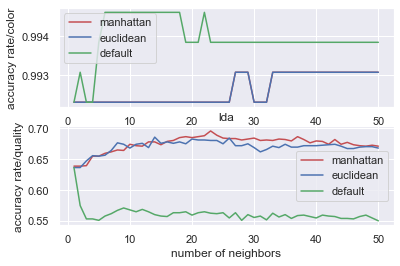

In [11]:
from sklearn.neighbors import KNeighborsClassifier
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
ran = 42
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
lda=LinearDiscriminantAnalysis().fit(X_train,y1_train)
X_train=lda.transform(X_train)
X_test=lda.transform(X_test)
neighbors=range(1,51)
result1=[]
result2=[]
result3=[]
plt.subplot(2,1,1)
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y1_train)
    neigh_2.fit(X_train,y1_train)
    neigh_3.fit(X_train,y1_train)
    result1.append(neigh_1.score(X_test,y1_test))
    result2.append(neigh_2.score(X_test,y1_test))
    result3.append(neigh_3.score(X_test,y1_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.subplot(2,1,2)
X = wine[D].values
y1 = np.ravel(wine[[C]])
y2 = np.ravel(wine[[L]])
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, test_size=0.2, random_state = ran) 
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, test_size=0.2, random_state = ran) 
lda=LinearDiscriminantAnalysis().fit(X_train,y2_train)
X_train=lda.transform(X_train)
X_test=lda.transform(X_test)
result1=[]
result2=[]
result3=[]
for n in neighbors:
    neigh_1=KNeighborsClassifier(n_neighbors=n,weights='distance',p=1)
    neigh_2=KNeighborsClassifier(n_neighbors=n,weights='distance',p=2)
    neigh_3=KNeighborsClassifier(n_neighbors=n)
    neigh_1.fit(X_train,y2_train)
    neigh_2.fit(X_train,y2_train)
    neigh_3.fit(X_train,y2_train)
    result1.append(neigh_1.score(X_test,y2_test))
    result2.append(neigh_2.score(X_test,y2_test))
    result3.append(neigh_3.score(X_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/quality')
plt.title('lda')
plt.plot(neighbors, result1,'r',label="manhattan")
plt.plot(neighbors, result2,'b',label="euclidean")
plt.plot(neighbors, result3,'g',label="default")
plt.legend()
plt.show()

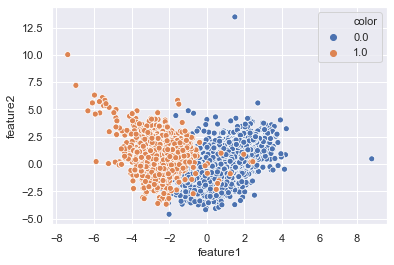

In [12]:
pca=PCA(n_components=2).fit(wine[D])
X1=pd.DataFrame(pca.transform(wine[D]))
X1.columns=['feature1','feature2']
X1['color']=wine[C].values
X1['quality']=wine[L].values
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="color", data=X1)


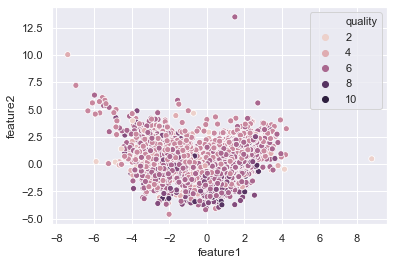

In [13]:
pca=PCA(n_components=2).fit(wine[D])
X1=pd.DataFrame(pca.transform(wine[D]))
X1.columns=['feature1','feature2']
X1['color']=wine[C].values
X1['quality']=wine[L].values
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="quality", data=X1)

/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


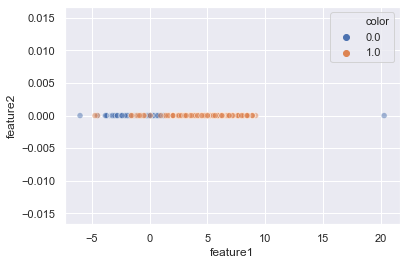

In [14]:
lda=LinearDiscriminantAnalysis(n_components=2).fit(wine[D],wine[C])
X2=lda.transform(wine[D])
X2=np.column_stack((X2,[0 for i in range(len(X2))]))
X2=pd.DataFrame(X2)
X2.columns=['feature1','feature2']
X2['color']=wine[C].values
g = sns.scatterplot(x="feature1", y="feature2",
                     hue="color", data=X2,alpha=0.5)

#g = sns.pairplot(X2, height=3,vars=['feature1','feature2'],hue='quality')

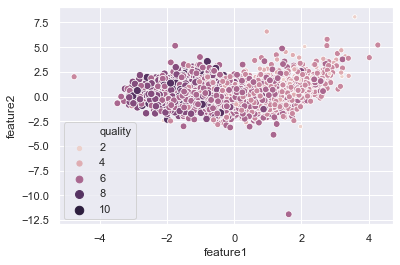

In [15]:
lda=LinearDiscriminantAnalysis(n_components=2).fit(wine[D],wine[L])
X2=lda.transform(wine[D])
X2=pd.DataFrame(X2)
X2.columns=['feature1','feature2']
X2['quality']=wine[L].values
g = sns.scatterplot(x="feature1", y="feature2",size='quality',
                     hue="quality", data=X2)

bonus 2 code

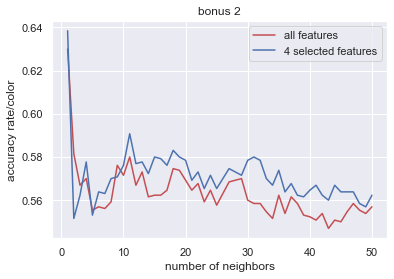

In [16]:
f=['volatile acidity', 'total sulfur dioxide', 'density', 'alcohol']
result1=[]
result2=[]
X1_train, X1_test, y1_train, y1_test = train_test_split(wine[D], y2, test_size=0.2, random_state = ran) 
X2_train, X2_test, y2_train, y2_test = train_test_split(wine[f], y2, test_size=0.2, random_state = ran) 
for n in neighbors:
    result1.append(KNeighborsClassifier(n_neighbors=n).fit(X1_train,y1_train).score(X1_test,y1_test))
    result2.append(KNeighborsClassifier(n_neighbors=n).fit(X2_train,y2_train).score(X2_test,y2_test))
plt.xlabel('number of neighbors')
plt.ylabel('accuracy rate/color')
plt.title('bonus 2')
plt.plot(neighbors, result1,'r',label="all features")
plt.plot(neighbors, result2,'b',label="4 selected features")
plt.legend()
plt.show()